# Blob detection and counting

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = 'samples/cells/0.jpg'
image = cv2.imread(image_path)

In [3]:
image.shape

(288, 352, 3)

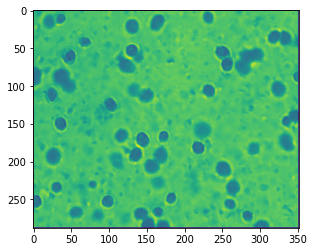

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [5]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

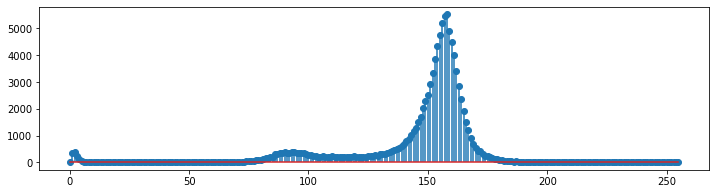

In [6]:
plt.figure(figsize=(12, 3))
plt.stem(hist)
plt.show()

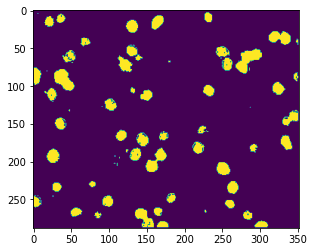

In [7]:
mask = cv2.inRange(gray, 75, 110)
plt.imshow(mask)

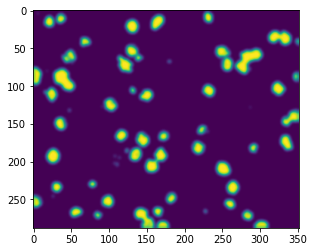

In [8]:
blur = cv2.GaussianBlur(mask, (11, 11), 0)
plt.imshow(blur)

In [9]:
threshold, thresholded = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [10]:
threshold

97.0

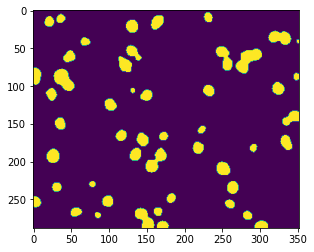

In [11]:
plt.imshow(thresholded)

## Simple blob detector

In [12]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByArea = True
params.minArea = 200
#params.filterByCircularity = True
#params.minCircularity = 0.75
#params.filterByConvexity = True
#params.minConvexity = 0.87
#params.filterByInertia = True
#params.minInertiaRatio = 0.01

In [13]:
detector = cv2.SimpleBlobDetector_create(params)

In [14]:
keypoints = detector.detect(image)

In [15]:
keypoints

(<KeyPoint 0x7feed27474e0>,
 <KeyPoint 0x7feed2643180>,
 <KeyPoint 0x7feed26431e0>,
 <KeyPoint 0x7feed2643060>,
 <KeyPoint 0x7feed26bbd80>,
 <KeyPoint 0x7feed26bbc60>,
 <KeyPoint 0x7feed26bbde0>,
 <KeyPoint 0x7feed26bbc90>,
 <KeyPoint 0x7feed26bbfc0>,
 <KeyPoint 0x7feed26bbcc0>,
 <KeyPoint 0x7feed26bbea0>,
 <KeyPoint 0x7feed26bbf90>,
 <KeyPoint 0x7feed26bbe70>)

In [16]:
bgr_image = cv2.imread(image_path)

In [17]:
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(bgr_image, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

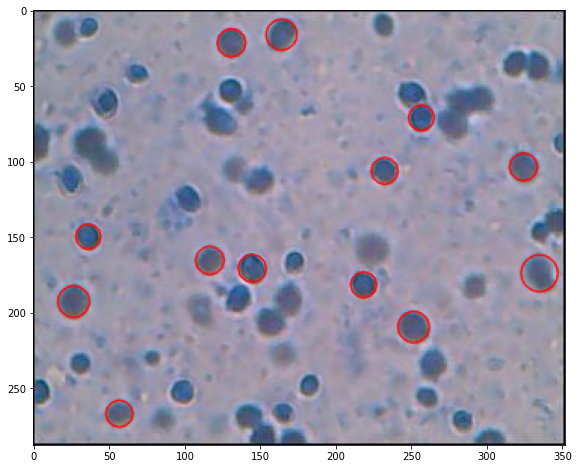

In [18]:
plt.figure(figsize=(12, 8))
result = cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

In [19]:
print(f'Blob count: {len(keypoints)}')

Blob count: 13
